# 📌 City of Ottawa Budget & Spending Analysis (Open Data Project)




# 🔷 Project Overview

##  **Objective**
This project analyzes service request trends in the City of Ottawa to **identify inefficiencies, forecast future demand, and optimize resource allocation**. By integrating **time-series forecasting (Prophet, ARIMA)**, **sentiment analysis**, and **clustering (K-Means)**, we gain actionable insights into improving municipal services. The study covers:
- **Historical service request trends** to uncover long-term patterns.
- **Most common request types** to understand service demand.
- **Ward-level analysis** to optimize geographic resource distribution.
- **Forecasting models** for predicting future service request volumes.
- **Sentiment analysis** to evaluate public satisfaction.
- **Clustering methods** for grouping service requests intelligently.

With data-driven insights, **city officials can make strategic decisions that improve public services and budget allocation.**


## **1️⃣ Data Loading & Cleaning**

In [1]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()
#2022_Monthly_Service_Requests.csv

Saving 2022_Monthly_Service_Requests.csv to 2022_Monthly_Service_Requests.csv


In [2]:


# Get the filename and file content from the uploaded dictionary
filename = list(uploaded.keys())[0]  # Get the first uploaded filename
file_content = uploaded[filename]  # Get the file content

# Create a file-like object using io.BytesIO
file_stream = io.BytesIO(file_content)

# Load the dataset using the file-like object
df = pd.read_csv(file_stream)

# Display basic info
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Convert date columns to datetime format
date_columns = ["DATE_RAISED"]  # Update column names if different
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")



# Fill missing values (example: replacing NaNs in 'Status' with 'Unknown')
#df["Status"].fillna("Unknown", inplace=True)

# Standardize service request types (example)
#df["Service Type"] = df["Service Type"].str.lower().str.replace("_", " ")

# Save the cleaned dataset
df.to_csv("311_cleaned.csv", index=False)

print("Data Cleaning Completed ✅")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308925 entries, 0 to 308924
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   SUBJECT      308925 non-null  object
 1   REASON       308925 non-null  object
 2   TYPE         308925 non-null  object
 3   DATE_RAISED  308925 non-null  object
 4   CHANNEL      308817 non-null  object
 5   WARD         295809 non-null  object
 6   ObjectId     308925 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 16.5+ MB
None
Missing values:
 SUBJECT            0
REASON             0
TYPE               0
DATE_RAISED        0
CHANNEL          108
WARD           13116
ObjectId           0
dtype: int64


<ipython-input-2-de15fd635cc1>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")


Data Cleaning Completed ✅


##  2️⃣ Service Request Trends Over Time
##  **Objective**
To analyze the historical patterns of service requests, identifying seasonal fluctuations, recurring

---

In [3]:
df["DATE_RAISED"] = pd.to_datetime(df["DATE_RAISED"], errors="coerce")

In [4]:
df["Year"] = df["DATE_RAISED"].dt.year
df["Month"] = df["DATE_RAISED"].dt.month

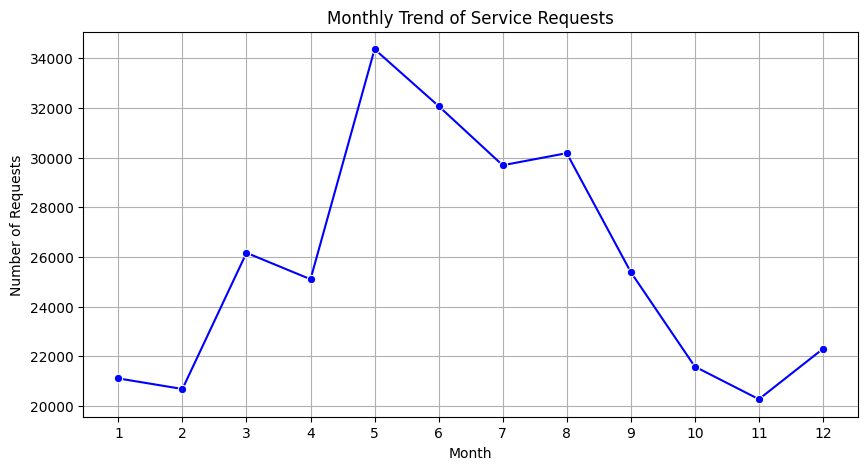

In [5]:

# Monthly Trends
monthly_trend = df.groupby("Month").size()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", color="blue")
plt.title("Monthly Trend of Service Requests")
plt.xlabel("Month")
plt.ylabel("Number of Requests")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


## 3️⃣ Top Categories by Request Volume
##  **Objective**
To identify the most frequently requested service categories, providing insights into which areas require the most attention from city officials. This helps optimize resource distribution, streamline service efficiency, and prioritize improvements based on public demand.

---

<ipython-input-6-23aa1b0a41be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette="viridis")


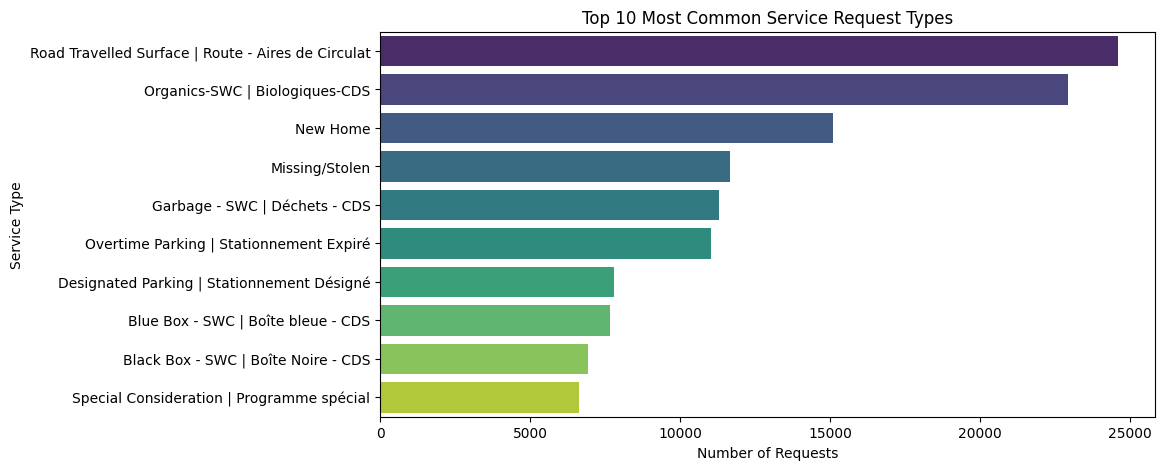

In [6]:
top_types = df["TYPE"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_types.values, y=top_types.index, palette="viridis")
plt.title("Top 10 Most Common Service Request Types")
plt.xlabel("Number of Requests")
plt.ylabel("Service Type")
plt.show()


## 4️⃣ Ward Analysis & Geo Insights
# **Objective**
To analyze the geographic distribution of service requests across different wards in Ottawa, identifying high-demand areas and resource allocation patterns. This helps optimize city planning, improve service delivery, and ensure equitable distribution of municipal resources.

---

<ipython-input-7-050a7d99c6bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wards.values, y=top_wards.index, palette="magma")


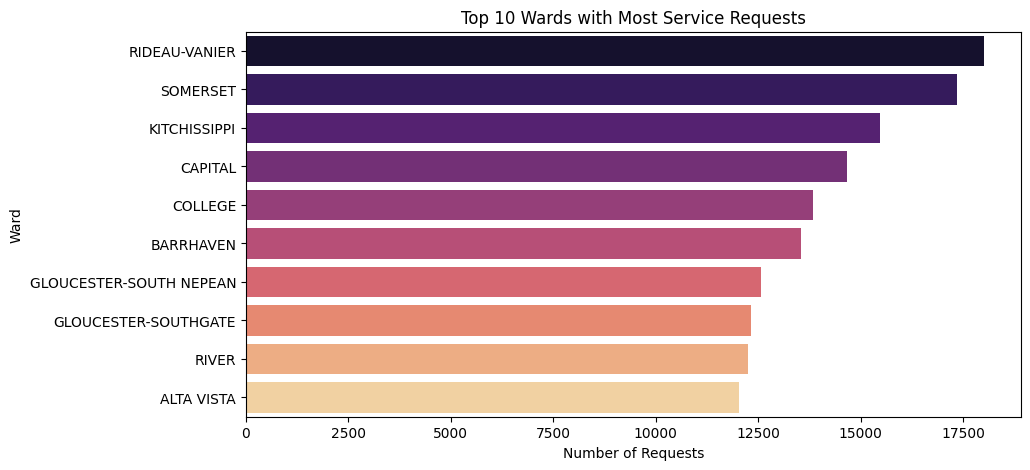

In [7]:
top_wards = df["WARD"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_wards.values, y=top_wards.index, palette="magma")
plt.title("Top 10 Wards with Most Service Requests")
plt.xlabel("Number of Requests")
plt.ylabel("Ward")
plt.show()

##  5️⃣ Predicting Future Service Requests
## **Objective**
To forecast future service request volumes using time-series modeling techniques such as **Prophet** and **ARIMA**, enabling city planners to anticipate demand fluctuations, optimize resource allocation, and improve public service efficiency.


---


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqdg_vfv/854xfi5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqdg_vfv/zuqro2k5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48001', 'data', 'file=/tmp/tmpoqdg_vfv/854xfi5k.json', 'init=/tmp/tmpoqdg_vfv/zuqro2k5.json', 'output', 'file=/tmp/tmpoqdg_vfv/prophet_modeljc57rb96/prophet_model-20250416194356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


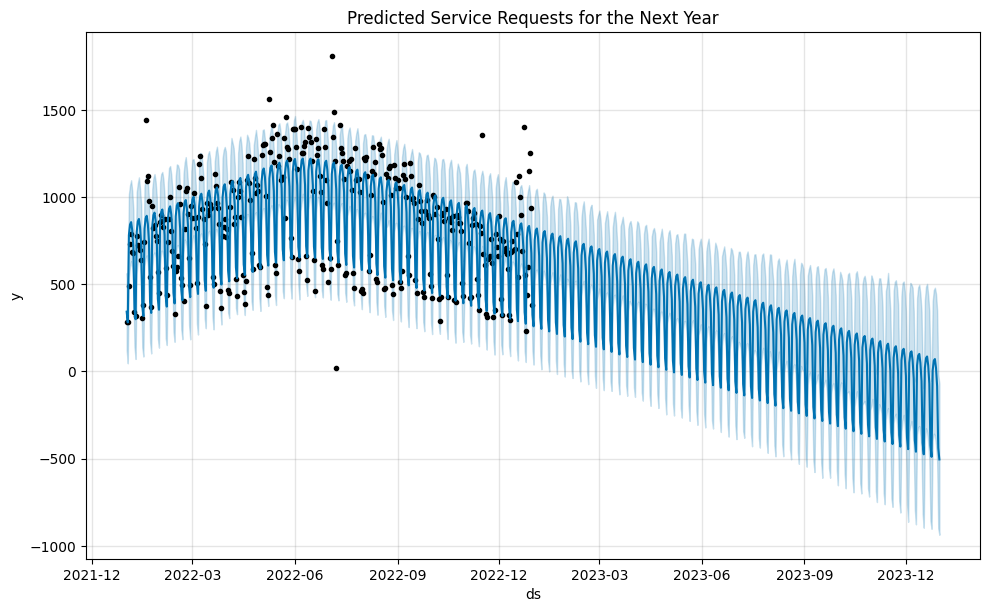

In [8]:
# Install Prophet (run this only if not installed)
!pip install prophet

# Import Prophet
from prophet import Prophet

# Prepare Data for Forecasting
df_forecast = df.groupby("DATE_RAISED").size().reset_index()
df_forecast.columns = ["ds", "y"]

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_forecast)

# Generate future predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
import matplotlib.pyplot as plt
model.plot(forecast)
plt.title("Predicted Service Requests for the Next Year")
plt.show()


## 6️⃣ Sentiment Analysis on Service Requests

## **Objective**
Using **TextBlob**, we analyze citizen feedback by determining the sentiment polarity of **service request descriptions**. This helps identify **positive, neutral, and negative trends** in public service experiences.

---

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


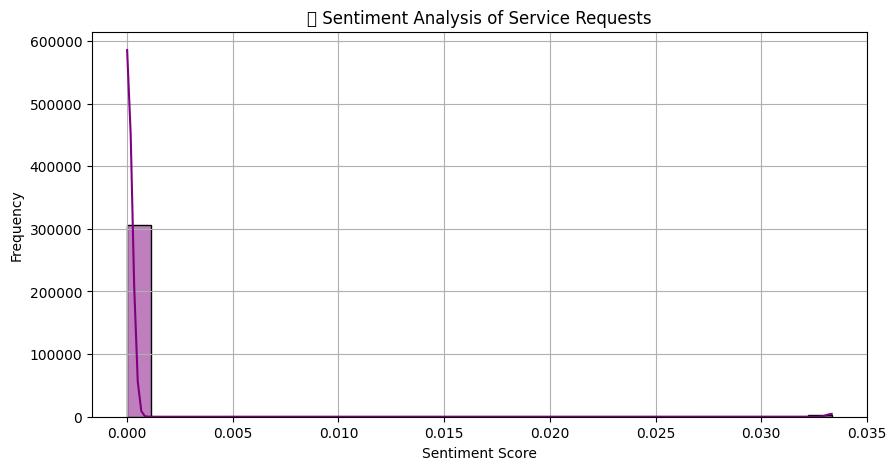

In [34]:
from textblob import TextBlob

# Example: Apply sentiment analysis on request descriptions
df["Sentiment"] = df["SUBJECT"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["Sentiment"], bins=30, kde=True, color="purple")
plt.title("📊 Sentiment Analysis of Service Requests")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## 7️⃣ City of Ottawa Service Request Clustering (K-Means)
##  **Objective**
Using **K-Means clustering**, we group service requests by **frequency and type** to identify patterns in **high-demand services**. This helps optimize **resource allocation and service efficiency**.

---

 **1️⃣ Preparing Data for Clustering**

In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode service request types as numbers
encoder = LabelEncoder()
df["TYPE_ENCODED"] = encoder.fit_transform(df["TYPE"])

# Group by service request type and count occurrences
df_cluster = df.groupby("TYPE_ENCODED").size().reset_index(name="Request Count")

print(df_cluster.head())  # Preview dataset for clustering


   TYPE_ENCODED  Request Count
0             0              2
1             1             13
2             2           4739
3             3             36
4             4             12


2️⃣ Applying K-Means Clustering

In [40]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X = df_cluster[["Request Count"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(X)

print(df_cluster.head())  # Show cluster assignments


   TYPE_ENCODED  Request Count  Cluster
0             0              2        0
1             1             13        0
2             2           4739        2
3             3             36        0
4             4             12        0


3️⃣ Visualizing Service Request Clusters

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


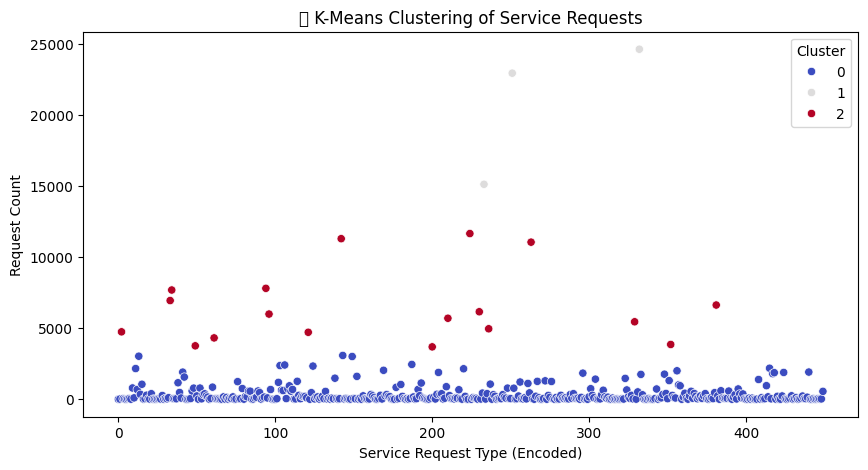

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cluster["TYPE_ENCODED"], y=df_cluster["Request Count"], hue=df_cluster["Cluster"], palette="coolwarm")
plt.title("🔎 K-Means Clustering of Service Requests")
plt.xlabel("Service Request Type (Encoded)")
plt.ylabel("Request Count")
plt.show()


4️⃣ Insights
By clustering service requests, we gain:

High-frequency request types needing better resource allocation.

Low-volume requests that might need strategic adjustments.

Optimized workforce management based on service demand.

# 📌 Conclusion

## 🔍 **Key Takeaways**
- Service request patterns reveal **seasonal trends** and **high-demand periods**.
- Certain request categories are **consistently frequent**, suggesting areas needing more resources.
- **Ward-level insights** highlight where service demand is concentrated.
- **Forecasting models** help anticipate future service needs, improving response efficiency.
- **Sentiment analysis** shows public perception of various service types.
- **Clustering techniques (K-Means)** segment service requests to optimize operational planning.

## 🚀 **Future Steps**
To further refine this analysis, we could:
- Incorporate **real-time service request data** for continuous tracking.
- Expand **geo-based predictions** using external factors like weather conditions.
- Enhance **budget analysis** by integrating financial efficiency insights.

This project provides valuable insights for city planners to make **data-driven decisions**, ensuring more **effective, responsive, and well-allocated municipal services** for Ottawa. 🎯  
